In [98]:
import config
import requests
import json
import math
import pyspark as ps
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from pyspark import SparkConf, SparkContext 
from pyspark.sql import SparkSession 
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,FloatType
from pyspark.sql.functions import desc, max, min
import pymysql
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
#For “Credit Card System,” create a Python and PySpark SQL program to read/extract the following JSON files according to the specifications found in the mapping document.``
spark = SparkSession.builder.appName('CreditCardApp').getOrCreate()
branchdf = spark.read.json(r"C:\Users\trigg\Downloads\Credit Card Dataset-20220831T180320Z-001\Credit Card Dataset\cdw_sapp_branch.json")
creditdf = spark.read.json(r"C:\Users\trigg\Downloads\Credit Card Dataset-20220831T180320Z-001\Credit Card Dataset\cdw_sapp_credit.json")
customerdf = spark.read.json(r"C:\Users\trigg\Downloads\Credit Card Dataset-20220831T180320Z-001\Credit Card Dataset\cdw_sapp_custmer.json")
creditdf.show()


+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+
|        114|4210653349028689|123459988| 14|    2|             1|       Education|             78.9|2018|
|         35|4210653349028689|123459988| 20|    3|             2|   Entertainment|            14.24|2018|
|        160|4210653349028689|123459988|  8|    7|             3|         Grocery|             56.7|2018|
|        114|4210653349028689|123459988| 19|    4|             4|   Entertainment|            59.73|2018|
|         93|4210653349028689|123459988| 10|   10|             5|             Gas|             3.59|2018|
|        164|4210653349028689|123459988| 28|    5|             6|       Education|             6.89|2018|
|        119|4210653349028689|123459988| 19|  

In [ ]:
#Once PySpark reads data from JSON files, and then utilizes Python, PySpark, and Python modules to load data into RDBMS(SQL), perform the following: Create a Database in SQL(MariaDB), named “creditcard_capstone.”
#Create a Python and Pyspark Program to load/write the “Credit Card System Data” into RDBMS(creditcard_capstone).

Host = 'localhost'
User =config.username
Password=config.password
conn = pymysql.connect(host=Host,user=User,password=Password)
cur  = conn.cursor()
cur.execute("CREATE DATABASE creditcard_capstone") 
cur.execute("SHOW DATABASES")
databaseList = cur.fetchall()
for database in databaseList:
    print(database)
conn.close()

branchdf.write.format('jdbc').mode('append').option('url','jdbc:mysql://localhost:3306/creditcard_capstone').option('dbtable','creditcard_capstone.CDW_SAPP_BRANCH').option('user','root').option('password','Trey2002').save()
creditdf.write.format('jdbc').mode('append').option('url','jdbc:mysql://localhost:3306/creditcard_capstone').option('dbtable','creditcard_capstone.CDW_SAPP_CREDIT_CARD').option('user','root').option('password','Trey2002').save()
customerdf.write.format('jdbc').mode('append').option('url','jdbc:mysql://localhost:3306/creditcard_capstone').option('dbtable','creditcard_capstone.CDW_SAPP_CUSTOMER').option('user','root').option('password','Trey2002').save()


In [ ]:
#Req-2.1
#Transaction Details Module
#Functional Requirements 2.1
#1)    Used to display the transactions made by customers living in a given zip code for a given month and year. Order by day in descending order.
def displaytransactions(zipcode):
    customerdf.join(creditdf,'CREDIT_CARD_NO','inner').select('TRANSACTION_VALUE',zipcode,'MONTH','YEAR').sort(desc('DAY')).show()
    return
#2)    Used to display the number and total values of transactions for a given type.
def displayvalues(type):
    creditdf.select(type,'TRANSACTION_VALUE').show()
#3)    Used to display the number and total values of transactions for branches in a given state.
def displaybystate(state):
    branchdf.join(creditdf,'BRANCH_CODE','inner').select('TRANSACTION_VALUE').where("BRANCH_STATE" == state).show()


In [104]:

#Functional Requirements 2.2
#1) Used to check the existing account details of a customer.
def checkaccount(cardNo):
    customerdf.filter(customerdf['CREDIT_CARD_No']==cardNo).show()
#2) Used to modify the existing account details of a customer.
#def updateaccount(ssn):
    
#3) Used to generate a monthly bill for a credit card number for a given month and year.
def generatebill(month,year,cardno):
    creditdfpd = creditdf.toPandas()
    creditdfpd2=creditdfpd[(creditdfpd['MONTH']==month ) & (creditdfpd['YEAR'] == year) & (creditdfpd['CREDIT_CARD_NO']== cardno)]
    return creditdfpd2
generatebill(9,2018,'4210653349028689')
#4) Used to display the transactions made by a customer between two dates. Order by year, month, and day in descending order.
def generatetransaction():
    creditdfpd = creditdf.toPandas()
    creditdfpd2=creditdfpd[(creditdfpd['MONTH']==month ) & (creditdfpd['YEAR'] == year) & (creditdfpd['CREDIT_CARD_NO']== cardno)]
    return creditdfpd2


,BRANCH_CODE,CREDIT_CARD_NO,CUST_SSN,DAY,MONTH,TRANSACTION_ID,TRANSACTION_TYPE,TRANSACTION_VALUE,YEAR
9,83,4210653349028689,123459988,3,9,10,Bills,100.38,2018
16,3,4210653349028689,123459988,28,9,17,Test,27.04,2018
34,95,4210653349028689,123459988,9,9,35,Test,96.55,2018
35,32,4210653349028689,123459988,28,9,36,Education,62.82,2018
37,158,4210653349028689,123459988,6,9,38,Education,63.08,2018
44,124,4210653349028689,123459988,8,9,45,Healthcare,20.81,2018
60,70,4210653349028689,123459988,22,9,61,Gas,84.13,2018
63,60,4210653349028689,123459988,18,9,64,Healthcare,89.81,2018
83,79,4210653349028689,123459988,25,9,84,Bills,70.25,2018
90,59,4210653349028689,123459988,1,9,91,Entertainment,97.64,2018


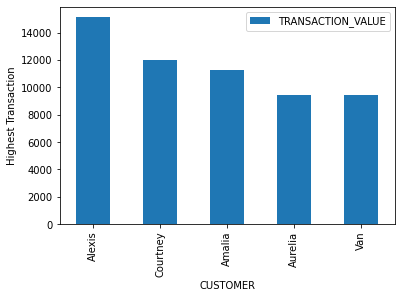

In [85]:
#3 - Functional Requirements - Data analysis and Visualization
#After data is loaded into the database, users can make changes from the front end, and they can also view data from the front end. Now, the business analyst team wants to analyze and visualize the data according to the below requirements.
##Req - 3
#Data Analysis and Visualization
#Functional Requirements 3.1
#Find and plot which transaction type has a high rate of transactions.
creditdfpd = creditdf.toPandas()
transaction_graph = creditdfpd.groupby(['TRANSACTION_TYPE']).sum()
transaction_graph.plot(kind= "bar",legend=None)
plt.xlabel('Transaction Type')
plt.ylabel('Rate')
plt.show()
#Note: Take a screenshot of the graphs. 
#Functional Requirements 3.2
#Find and plot which state has a high number of customers.
customerdfpd = customerdf.toPandas()
state_graph = customerdfpd.groupby(["CUST_STATE"]).count()
state_graph.plot(kind = 'bar',legend=None)
plt.xlabel('State')
plt.ylabel('Customers per State')
plt.show
#Note: Take a screenshot of the graphs. 
#unctional Requirements 3.3
#Find and plot the sum of all transactions for each customer, and which customer has the highest transaction amount.
#hint(use CUST_SSN).
combinedf = customerdf.join(creditdf,customerdf['SSN']==creditdf['CUST_SSN'],'inner').select("FIRST_NAME","TRANSACTION_VALUE")
combinedfpd= combinedf.toPandas()
hightest_transaction = combinedfpd.sort_values(by = ['FIRST_NAME']).groupby(["FIRST_NAME"]).sum().sort_values(by=['TRANSACTION_VALUE'], ascending=False).head()
hightest_transaction.plot(kind = 'bar')
plt.xlabel("CUSTOMER")
plt.ylabel('Highest Transaction')
plt.show()
#Note: Take a screenshot of the graphs. 



In [ ]:
#4. Functional Requirements - LOAN Application Dataset
#Req-4
# Access to Loan API Endpoint
#Functional Requirements 4.1
#Create a Python program to GET (consume) data from the above API endpoint for the loan application dataset.
def getapi():
    url = 'https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json'
    response= requests.get(url)
    return response
#Functional Requirements 4.2
#Find the status code of the above API endpoint.
url= 'https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json'
response= requests.get(url)
response.status_code


#Hint: status code could be 200, 400, 404, 401.
#Functional Requirements 4.3
#Once Python reads data from the API, utilize PySpark to load data into RDBMS(SQL). The table name should be CDW-SAPP_loan_application in the database.
json_rdd = sc.parallelize([response.text])
loandf = spark.read.json(json_rdd)
loandf.show()
loandf.write.format('jdbc').mode('append').option('url','jdbc:mysql://localhost:3306/creditcard_capstone').option('dbtable','creditcard_capstone.CDW_SAPP_loan_application').option('user','root').option('password','Trey2002').save()
#142Note: Use the “creditcard_capstone” database.



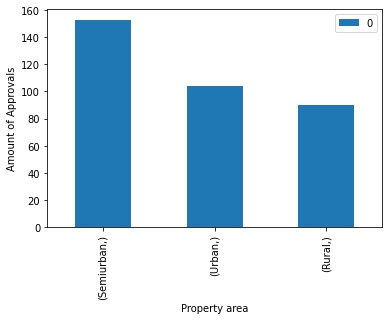

In [95]:
#After the data is loaded into the database, the business analyst team wants to analyze and visualize the data according to the below requirements.
#Data Analysis and Visualization
#Functional Requirements 5.1

#Create a bar chart that shows the difference in application approvals for Married Men vs Married Women based on income ranges. (number of approvals)
df2= loandf.filter(loandf['Application_Status'] =='Y')
df2pd= df2.toPandas()
df3= df2.filter(df2['Married']=='Yes')
df3pd= df3.toPandas()
MenVsWomen=df3pd[["Gender",'Income']].value_counts().to_frame()
MenVsWomen.head()
MenVsWomen.plot(kind='bar')
plt.xlabel('Men Vs Women')
plt.ylabel('Approvals')
plt.show()
#Note: Take a screenshot of the graph. 
#Functional Requirements 5.2
#Create and plot a chart that shows the difference in application approvals based on Property Area. 
Property = df2pd[['Property_Area']].value_counts().to_frame()
Property.plot(kind='bar')
plt.xlabel("Property area")
plt.ylabel('Amount of Approvals')
plt.show()

#Note: Take a screenshot of the graph.




